<a href="https://colab.research.google.com/github/THEWACHER1103/Analisis_SuperStore/blob/main/Analisis_crediticio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cs-training.csv', index_col='Unnamed: 0')

## Detalle:

No existen nulos
* tenemos columnas que son floats
* columnas con datos faltantes (NumberOfDependents,MonthlyIncome)
*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [4]:
import pandas as pd

def describe_modif(df):
    num_df = df.select_dtypes(include='number')
    desc = num_df.describe()
    desc.loc['count ceros'] = (num_df == 0).sum()
    desc.loc['count negativos'] = (num_df < 0).sum()
    desc.loc['count null'] = num_df.isna().sum()
    desc.loc['pct ceros'] = (num_df == 0).mean()
    desc.loc['pct negativos'] = (num_df < 0).mean()
    desc.loc['pct nulls'] = num_df.isna().mean()
    desc.loc['Coef. Variacion'] = desc.loc['std'] / desc.loc['mean']
    q1 = desc.loc['25%']
    q3 = desc.loc['75%']
    iqr = q3 - q1
    desc.loc['IQR'] = iqr
    outliers = (
        (num_df < (q1 - 1.5 * iqr)) |
        (num_df > (q3 + 1.5 * iqr))
    ).sum().round(2)
    desc.loc['Conteo de Outliers'] = outliers
    desc.loc['Asimetria'] = num_df.skew()
    percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
    for p in percentiles:
        desc.loc[f'P{int(p*100)}'] = num_df.quantile(p)

    return desc.round(2)

## Column Description:

* SeriousDlqin2yrs = Persona con un retraso en el pago de 90 días o más.

* RevolvingUtilizationOfUnsecuredLines = Saldo total de tarjetas de crédito y líneas de crédito personales, excepto bienes inmuebles y deudas sin cuotas, como préstamos para automóviles, dividido por la suma de los límites de crédito.

* age = Edad del prestatario en años.

* NumberOfTime30-59DaysPastDueNotWorse = Número de veces que el prestatario ha tenido un retraso de 30 a 59 días sin agravarse en los últimos 2 años.

* DebtRatio =  Pagos mensuales de la deuda, pensión alimenticia y gastos de manutención divididos entre los ingresos brutos mensuales.

* MonthlyIncome = Ingresos mensuales.

* NumberOfOpenCreditLinesAndLoans = Número de préstamos abiertos (a plazos, como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito).

* NumberOfTimes90DaysLate = Número de veces que el prestatario ha tenido un retraso de 90 días o más.

* NumberRealEstateLoansOrLines = Número de hipotecas y préstamos inmobiliarios, incluidas las líneas de crédito con garantía hipotecaria.

* NumberOfTime60-89DaysPastDueNotWorse = Número de veces que el prestatario ha tenido un retraso de 60 a 89 días, pero sin empeorar en los últimos dos años.

* NumberOfDependents = Número de personas a cargo en la familia, excluyéndose a sí mismo (cónyuge, hijos, etc.).

In [5]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Observaciones:


SeriousDlqin2yrs:
* Total de 150k Datos.
*La variable objetivo presenta 150,000 observaciones con una tasa de incumplimiento del 6.68%, lo que confirma un fuerte desbalance de clases. Al tratarse de una variable binaria, la desviación estándar (0.25) refleja la dispersión esperada en eventos raros. El coeficiente de variación de 3.74 y la asimetría positiva de 3.47 confirman que la variable está altamente sesgada hacia la clase negativa.

Revolving:
* Promedio irregular, Se entiende que esa variable debe estar entre 0 y 1, posiblemente se tuvieron errores de captura, la presencia de valores extremadamente altos genera una asimetria extrema(97.63)(pienso que requiere transformacion o capping)



Age:
* La edad minima presenta un error, puesto que el minimo de edad requerida para un credito es > 18, pero al ver la cuenta de los ceros confirmo que es solo uno(outlier), luego de eso no existen negativos ni nulos.

* el promedio de 52 años me parece bastante realista y razonable con una desviacion estandar de 15 años dando una dispersion de los datos baja.

* al ver el coeficiente de variacion valido que los datos estan homogeneos 0.28, es moderada y consistente con una poblacion adulta.

* me parece anomalo el max de 109 años, seria altamente inprobable que el banco de un credito a una persona de esa edad.


NumberOfTime30-59DaysPastDueNotWors:

* La variable presenta una dispersion muy alta, teniendo un promedio de 0.42 y una STD de 4.19, esto confirmado con el cofieicnte de variacion de la varieble de 9.95(La variable es dominada por Outliers, por esto no es representativa)

* El maximo de atrasos leves presentados por ciudadano es de 98 veces, el minimo es 0.

* La variable muy sesgada.

DebtRatio:


* La capacidad de endeudamiento promedio es de 353 y la STD es de 2037.81, esto indica que esta bastante desequilibrada la variable, esto es confirmado por el CV de 5.77, la variable esta siendo afectada por valores extremos, esto crea desbalance en la misma.(la cantidad no es representativa, debido a valores extremos)

MonthlyIncome:
* El salario promedio es de 6,670.22, esto tomando en cuenta que aproximadamente el 20% de los datos en la variable son nulos, esto explica porque tenemos una desviacion estandar alta alcanzando los 14,384.67.

NumberOfOpenCreditLinesAndLoans:
* No existen nulos, el maximo de creditos abiertos por ciudadano en el la variable es de 58 la cual no es una cantidad representativa, el promedio de creditos abiertos es de 8.45, con una dispersion baja de 5.15, un ciudadano puede tener de 5 a 8 productos al mismo tiempo, seria bueno validar esto contra la variable numberoftime30-59day.

* la variable presenta una asimetria de 1.22, la misma se encuentra un pocoquito sesgada a la derecha. CV es de 0.61 el mismo esta sumamente balanceado, contamos con 3980 Outliers cantidad bastante moderada para la variable.

 * me parece una variable bastante realista y con buena distribucion.

 NumberOfTimes90DaysLate:
 * la variable determina el numero de veces que el ciudadano realizo un pago 90 dias tarde, el promedio de 0.27 no es una medida representativa segun entiendo, veo bastante normal el conteo de los ceros lo que indicaria un comportamiendo normal, la variable presenta una asimeria de 23.09 indicando que es una variable sesgada a numeros muy altos y comportamientos de inpago, lo que me confirma esto es que el CV de 15.08 dejando saber que existe una gran dispersion de los datos con relacion a su promedio.

 NumberRealEstateLoansOrLines:
 * esta es una variable poco dispersa el promedio es de 1.02 y su STD es de 1.13, el MAX=54 me parce un Outlier, puesto que en el tercer quartil lleva numeros de 2 y luego para el cuarto quartil salta a 54, seria poco probable que un ciudadano normal tenga 58 creditos hipotecarios activos, el CV me parece bastante razonable con 1.11 indicando que existe poca dispersion en la variable siendo coherente con el promedio y la desviacion estandar,

 NumberOfTime60-89DaysPastDueNotWorse:
 * numero de veces que a tenido un atraso de 60 a 89 dias, tiene una dispersion bastante alta con una STD de 4.16 y una CV de 17.29, los datos estan muy dispersos esto tambien lo confirma la asimetria de 23.33.,el promedio no es representativo de la muestra

 NumberOfDependents:
 * la variable presenta valores nulos unos 3,924, presenta una asimetria leve lo que indica que se encuentra un poco alejada del promedio poco sesgo, el alto porcentaje de ceros podria indicar hogares sin dependientes, hipotesis debe validarse cruzando con la variable edad.

In [15]:
describe_modif(df)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00
count ceros,139974.00,10878.00,1.00,126018.00,4113.00,1634.00,1888.00,141662.00,56188.00,142396.00,86902.00
count negativos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


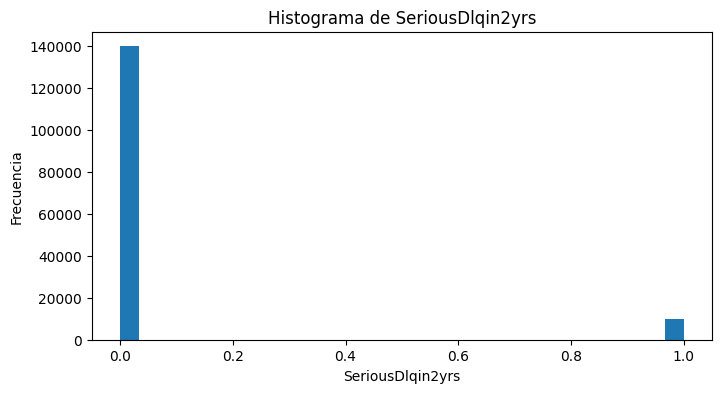

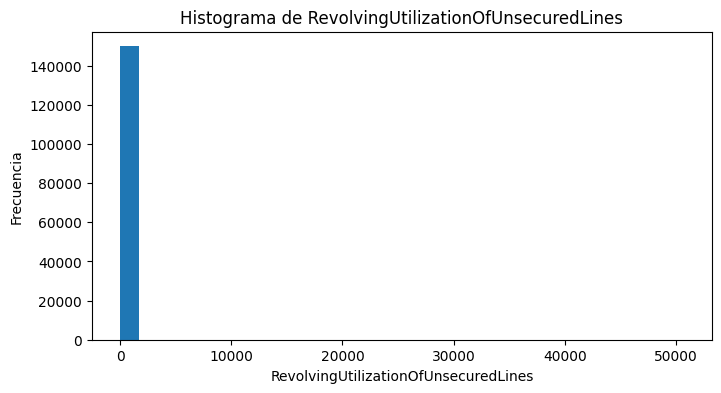

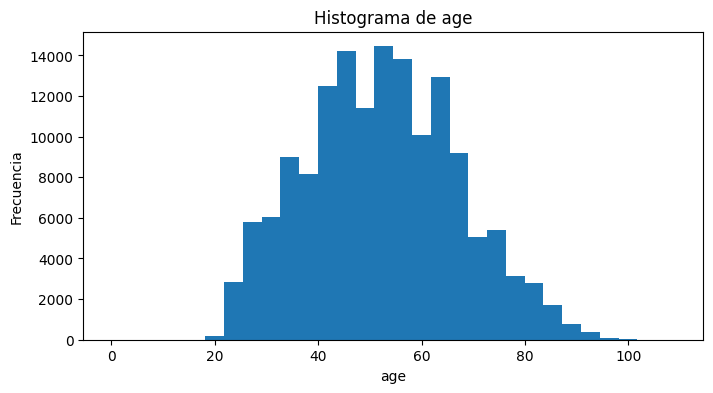

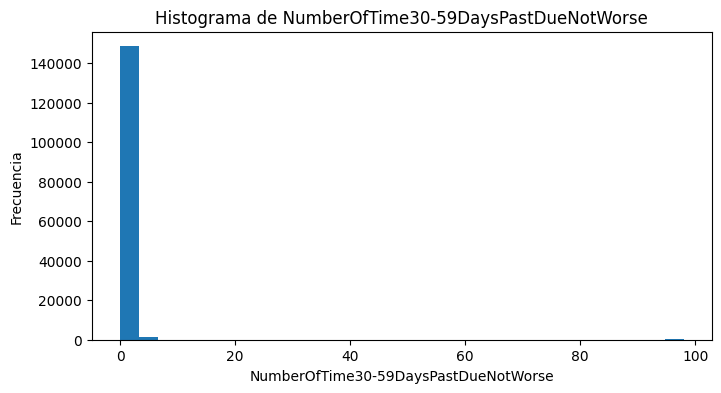

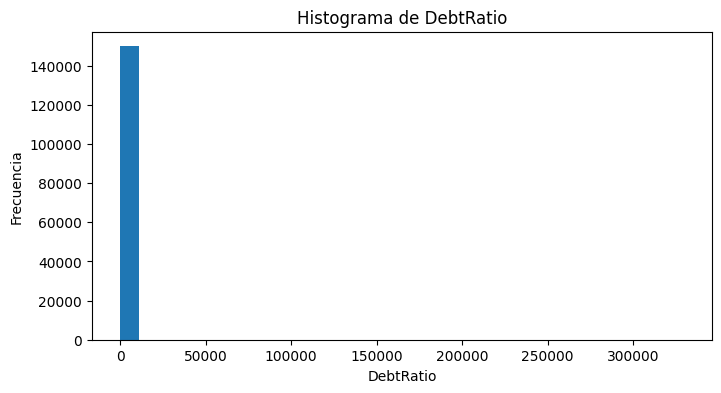

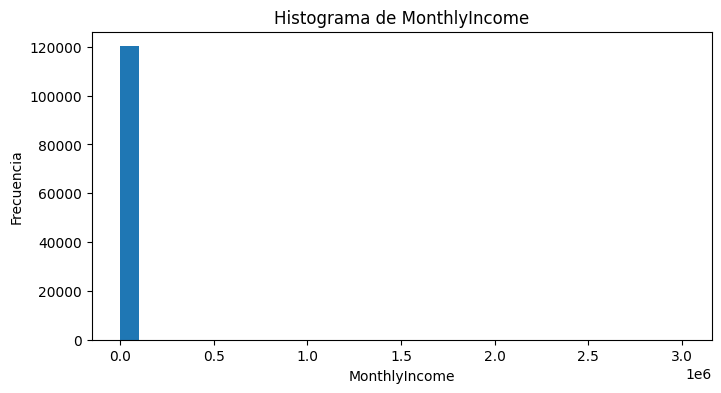

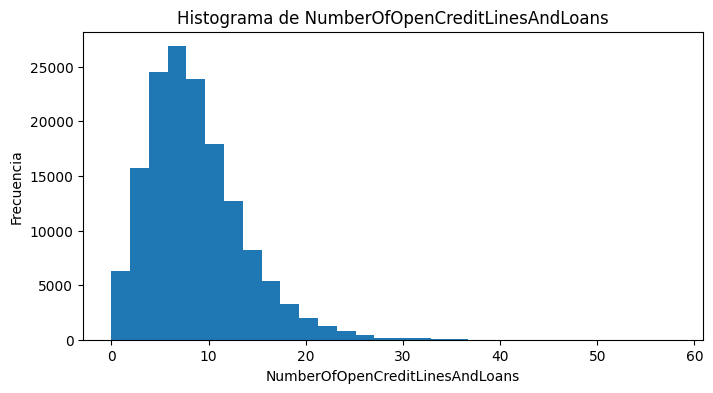

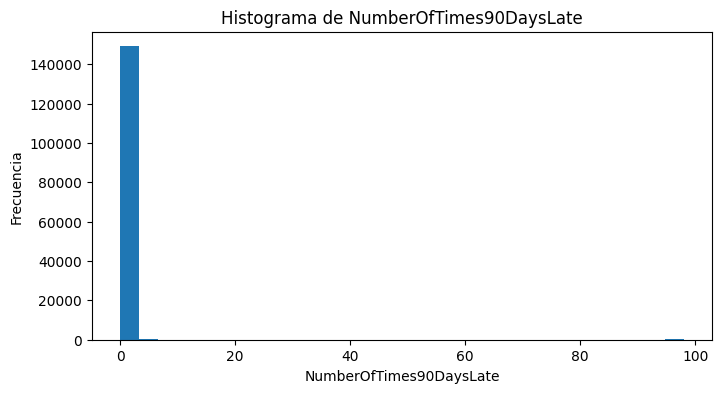

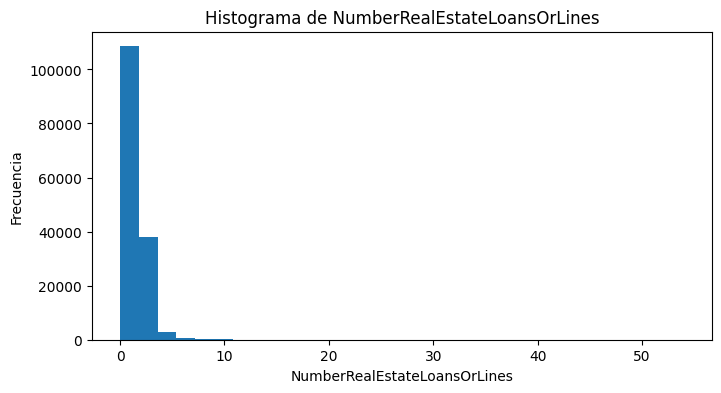

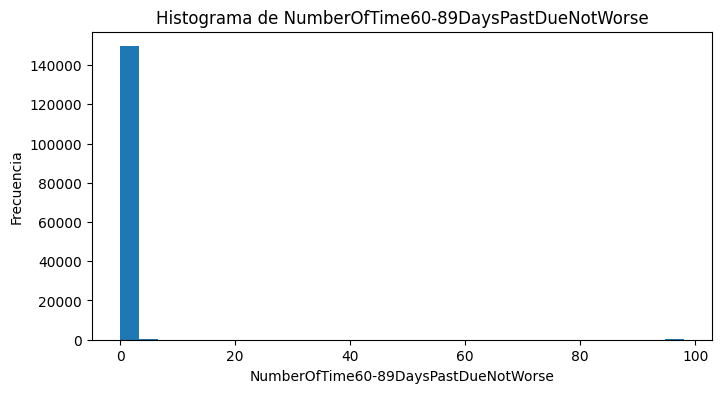

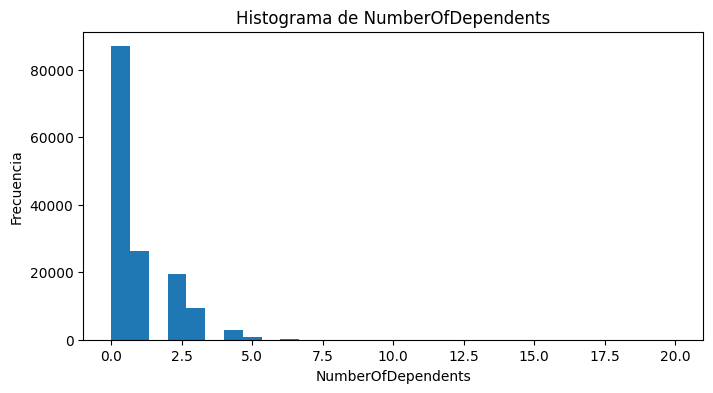

In [7]:
columns = df.select_dtypes(include=np.number).columns
for col in columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()